In [1]:
!mkdir plots

mkdir: cannot create directory `plots': File exists


In [1]:
%matplotlib inline
import pandas as pd
from os import listdir
from os.path import join
from scipy import stats
import matplotlib.pyplot as plt
from statistics import mean, stdev
import numpy as np
import random
# import matplotlib.gridspec as? gridspec

In [2]:
stats.spearmanr([2,3,1], [2,1,3])

SpearmanrResult(correlation=-1.0, pvalue=0.0)

In [3]:
# input_path = "../data/synoymsWithoutIncExcRelevancySorted"
input_path_1 = "../data/1_pageRank"
input_path_2 = "../data/1.1_exactWordWithoutIncExcSortedOnTheBasisOfRelevancy"
input_path_3 = "../data/1.2_exact_Inclusion_Exclusion_Final_relevancy_based_sorted"
input_path_4 = "../data/2.1_synoymsWithoutIncExcRelevancySorted"
input_path_5 = "../data/2.2_synset_Inclusion_Exclusion_Final_Relevancy_Based_Sorted"
input_path = "data/ExtendedRRF_without_recency/"

In [4]:
files = listdir(input_path)
files

['already having Celiac Disease_ext_page_rank_24.csv',
 'antiretroviral therapy first time_ext_page_rank_68.csv',
 'constipation safe treatments_ext_page_rank_25.csv',
 'dietary approaches for obesity treatment_ext_page_rank_66.csv',
 'Dietary Therapy Epilepsies_ext_page_rank_20.csv',
 'Early Parkinson disease treatment_ext_page_rank_52.csv',
 'haemorrhage cure_ext_page_rank_126.csv',
 'HIV infection seronegativity_ext_page_rank_72.csv',
 'HIV infection Treatment naive_ext_page_rank_25.csv',
 'Hypercholesterolemia safe treatments_ext_page_rank_24.csv',
 'hypertension safe treatments_ext_page_rank_73.csv',
 'low back pain therapy workout_ext_page_rank_41.csv',
 'malnutrition in young children_ext_page_rank_71.csv',
 'managing constipation in children_ext_page_rank_95.csv',
 'Nonvalvular atrial fibrillation_ext_page_rank_284.csv',
 'out of hospital cardiac arrest_ext_page_rank_67.csv',
 'Outcomes of cerebrovascular accident_ext_page_rank_456.csv',
 'postoperative delirium_ext_page_rank_5

In [5]:
def cal_rank_given_index_list(index_list):
    rank = 1
    rank_list = [0 for item in range(len(index_list))]
    for item in index_list:
        rank_list[item] = rank
        rank += 1
    return rank_list

In [6]:
spearman_val_relevance_adversity = []
#spearman_val_relevancy_recency = []
spearman_val_relevancy_popularity_sum = []

#spearman_val_adversity_recency = []
spearman_val_adversity_popularity_sum = []

#spearman_val_recency_popularity_sum = []

p_val_relevance_adversity = []
#p_val_relevancy_recency = []
p_val_relevancy_popularity_sum = []

#p_val_adversity_recency = []
p_val_adversity_popularity_sum = []

#p_val_recency_popularity_sum = []

for file in files:
    print(file)
    
    df = pd.read_csv(join(input_path, file), encoding='latin-1')
    
    df['tot_subj_affected'] = df['tot_subj_affected'].fillna(value=0)
    df['citationSum'] = df['citationSum'].fillna(value=0)
    
#     relevancy_value = df.briefTitleAndSummaryCombinedPageRankScore.values
#     popularity_value_sum = df.citationSum.values
#     popularity_value_avg = df.citationAvg.values
#     recency_value = df.CompletionDate.values
    
#     rel_index = df.sort_values(by=['brief_summary_matched_count', 'official_title_matched_count', 'brief_title_matched_count', 'briefTitleAndSummaryCombinedPageRankScore'], ascending=[False, False, False, False]).index.tolist()
    rel_index = df.index.tolist()
    
    df_a = df.sample(frac=1.0, random_state=1)
    adv_index = df_a.sort_values(by=['tot_subj_affected'], ascending=[False]).index.tolist()
    
    
    #rec_index = df.sort_values(by=['CompletionDate'], ascending=[False]).index.tolist()
    pop_sum_index = df.sort_values(by=['citationSum'], ascending=[False]).index.tolist()
    
    print("Relevancy Index:", rel_index)
    print("Adversity Index:", adv_index)
    #print("Recency Index:", rec_index)
    print("Popularity Index:", pop_sum_index)
    
    
    rel_rank_list = cal_rank_given_index_list(rel_index)
    adv_rank_list = cal_rank_given_index_list(adv_index)
    #rec_rank_list = cal_rank_given_index_list(rec_index)
    pop_sum_rank_list = cal_rank_given_index_list(pop_sum_index)
#     print(pop_avg_rank_list)
    
    spearman_val_relevance_adversity.append(stats.spearmanr(rel_rank_list, adv_rank_list)[0])
    p_val_relevance_adversity.append(stats.spearmanr(rel_rank_list, adv_rank_list)[1])
    #spearman_val_relevancy_recency.append(stats.spearmanr(rel_rank_list, rec_rank_list)[0])
    #p_val_relevancy_recency.append(stats.spearmanr(rel_rank_list, rec_rank_list)[1])
    spearman_val_relevancy_popularity_sum.append(stats.spearmanr(rel_rank_list, pop_sum_rank_list)[0])
    p_val_relevancy_popularity_sum.append(stats.spearmanr(rel_rank_list, pop_sum_rank_list)[1])
    
    #spearman_val_adversity_recency.append(stats.spearmanr(adv_rank_list, rec_rank_list)[0])
    #p_val_adversity_recency.append(stats.spearmanr(adv_rank_list, rec_rank_list)[1])
    spearman_val_adversity_popularity_sum.append(stats.spearmanr(adv_rank_list, pop_sum_rank_list)[0])
    p_val_adversity_popularity_sum.append(stats.spearmanr(adv_rank_list, pop_sum_rank_list)[1])
    
    #spearman_val_recency_popularity_sum.append(stats.spearmanr(rec_rank_list, pop_sum_rank_list)[0])
    #p_val_recency_popularity_sum.append(stats.spearmanr(rec_rank_list, pop_sum_rank_list)[1])

already having Celiac Disease_ext_page_rank_24.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Adversity Index: [13, 18, 11, 12, 8, 9, 22, 23, 15, 0, 16, 1, 21, 7, 6, 19, 2, 4, 10, 17, 20, 14, 3, 5]
Popularity Index: [23, 8, 22, 3, 15, 21, 0, 4, 7, 2, 16, 1, 11, 9, 19, 17, 20, 6, 18, 13, 5, 14, 10, 12]
antiretroviral therapy first time_ext_page_rank_68.csv
Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Adversity Index: [18, 39, 38, 10, 24, 42, 0, 52, 12, 8, 31, 41, 19, 32, 34, 40, 57, 36, 7, 15, 9, 43, 23, 4, 14, 29, 28, 5, 16, 45, 1, 11, 53, 66, 67, 30, 50, 25, 6, 20, 61, 22, 44, 48, 54, 64, 33, 27, 55, 2, 51, 26, 59, 49, 21, 13, 56, 3, 35, 46, 63, 17, 47, 62, 60, 58, 65, 37]
Popularity Index: [27

Relevancy Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [7]:
fig = plt.figure(figsize=(20,30))
gs = plt.GridSpec(6, 2)

<Figure size 1440x2160 with 0 Axes>

In [8]:
def plotAndSaveFigure(x, y, saveFileName, fig, row):

    # Calculate the simple average of the data
    y_mean = [np.mean(y)]*len(x)
    
    ax = fig.add_subplot(gs[row,0])
    
    #set title
#     ax.title.set_text(saveFileName)
    ax.set_title(saveFileName)
    
    # Plot the data
    data_line = ax.plot(x,y, label='Data', marker='o')

    # Plot the average line
    mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

    # Make a legend
    legend = ax.legend(loc='best')
    
    ax.set_ylim((-1,1))
    fig.show()
#     plt.show()
#     fig.savefig(saveFileName, dpi=1000)
    print("Mean:", round(y_mean[0], 2))
    print("Standard Deviation:", round(stdev(y), 2))

In [9]:
def plotPValue(x, y, saveFileName, fig, row):

    # Calculate the simple average of the data
    y_mean = [np.mean(y)]*len(x)
    ax = fig.add_subplot(gs[row,1])
    
    #set title
    ax.title.set_text(saveFileName)
    
    # Plot the data
    data_line = ax.plot(x,y, label='Data', marker='o')

    # Plot the average line
    mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')

    # Make a legend
    legend = ax.legend(loc='best')
    
    ax.set_ylim((0,1))
    fig.show()
    print("Mean:", round(y_mean[0], 2))
    print("Standard Deviation:", round(stdev(y), 2))

### Relevancy Adversity

In [11]:
row = 0
plotAndSaveFigure(range(1,26), spearman_val_relevance_adversity, "Spearman's Rank-Order Correlation Between Relevancy And Adversity", fig, row)
plotPValue(range(1,26), p_val_relevance_adversity, "p values Between Relevancy And Adversity", fig, row)


Mean: 0.1
Standard Deviation: 0.19
Mean: 0.38
Standard Deviation: 0.32


<ipython-input-8-55dbfcbe6ad6>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[row,0])
<ipython-input-8-55dbfcbe6ad6>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-bb0df3334d0f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[row,1])
<ipython-input-9-bb0d

### Relevancy Recency

In [12]:
row = 1
plotAndSaveFigure(range(1,26), spearman_val_relevancy_recency, "Spearman's Rank-Order Correlation Between Relevancy And Recency", fig, row)
plotPValue(range(1,26), p_val_relevancy_recency, "p value between Relevancy And Recency", fig, row)

Mean: -0.09
Standard Deviation: 0.22
Mean: 0.42
Standard Deviation: 0.32


### Relevacny Popularity

In [13]:
row = 2
plotAndSaveFigure(range(1,26), spearman_val_relevancy_popularity_sum, "Spearman's Rank-Order Correlation Between Relevancy And Popularity Sum", fig, row)
plotPValue(range(1,26), p_val_relevancy_popularity_sum, "p value between Relevancy And Popularity Sum", fig, row)

Mean: 0.08
Standard Deviation: 0.28
Mean: 0.32
Standard Deviation: 0.3


### Adversity Recency

In [14]:
row = 3
plotAndSaveFigure(range(1,26), spearman_val_adversity_recency, "Spearman's Rank-Order Correlation Between Adversity And Recency", fig, row)
plotPValue(range(1,26), p_val_adversity_recency, "p value between Adversity And Recency", fig, row)

Mean: 0.01
Standard Deviation: 0.24
Mean: 0.37
Standard Deviation: 0.3


### Adversity Popularity

In [15]:
# print(len(spearman_val_adversity_popularity_sum))
row = 4
plotAndSaveFigure(range(1,26), spearman_val_adversity_popularity_sum, "Spearman's Rank-Order Correlation Between Adversity And Popularity Sum", fig, row)
plotPValue(range(1,26), p_val_adversity_popularity_sum, "p value between Adversity And Popularity Sum", fig, row)

Mean: 0.14
Standard Deviation: 0.17
Mean: 0.41
Standard Deviation: 0.37


### Recency Popularity

In [16]:
row = 5
plotAndSaveFigure(range(1,26), spearman_val_recency_popularity_sum, "Spearman's Rank-Order Correlation Between Recency And Popularity Sum", fig, row)
plotPValue(range(1,26), p_val_recency_popularity_sum, "p value Between Recency And Popularity Sum", fig, row)

Mean: -0.42
Standard Deviation: 0.17
Mean: 0.09
Standard Deviation: 0.15


In [17]:
fig.savefig("spearmanPvalueBetweenAllCombinations.png", format="png", dpi=100)

In [13]:
print("%6s"%1.0, "%6s"%round(mean(spearman_val_relevance_adversity), 2), "%6s"%round(mean(spearman_val_relevancy_popularity_sum), 2))
print("%6s"%round(mean(spearman_val_relevance_adversity), 2), "%6s"%1.0, "%6s"%round(mean(spearman_val_adversity_popularity_sum), 2))
#print("%6s"%round(mean(spearman_val_relevancy_recency), 2), "%6s"%round(mean(spearman_val_adversity_recency), 2), "%6s"%1.0, "%6s"%round(mean(spearman_val_recency_popularity_sum), 2))
print("%6s"%round(mean(spearman_val_relevancy_popularity_sum), 2), "%6s"%round(mean(spearman_val_relevancy_popularity_sum), 2),  "%6s"%1.0)

   1.0    0.1   0.06
   0.1    1.0   0.14
  0.06   0.06    1.0


In [19]:
per_nan_val = []
for file in files:
    df = pd.read_csv(join(input_path, file))
    emp_vals = round((df.tot_subj_affected.isna().sum()/df.shape[0])*100, 2)
    per_nan_val.append(emp_vals)
per_nan_val = [(100 - item) for item in per_nan_val]

In [20]:
def plotAdverseEventsEmptyValues(percentage):
    objects = ('Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25')
    y_mean = [np.mean(percentage)]*len(percentage)
    print("Mean Percentage:", y_mean[0])
    y_pos = np.arange(len(objects))
    
    plt.figure(figsize=(15, 3))
    plt.bar(y_pos, percentage, align='center', alpha=0.5)
    
    plt.xticks(y_pos, objects)
    
    # Plot the average line
    plt.plot(y_pos, y_mean, label='Mean', linestyle='--')
    
    plt.xlabel('Query Number')
    plt.ylabel('Percentage')
    plt.title('Percentage of clinical Trials in each query where adverse events are reported')
    plt.ylim((0,100))
    plt.show()
    plt.savefig("AdverEventsPercentage")

Mean Percentage: 29.906800000000004


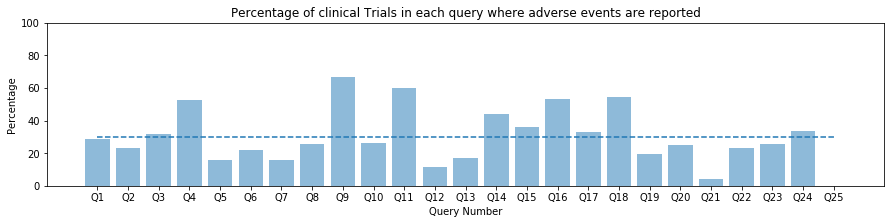

<Figure size 432x288 with 0 Axes>

In [21]:
plotAdverseEventsEmptyValues(per_nan_val)